Importing relevant libraries.

In [4]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.14.0


Import support libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Reset image size and initialize the data generator.

In [6]:
img_width = 65
img_height = 65

Data_generator = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

Generating the training set.

In [7]:
training_data_generator =Data_generator.flow_from_directory(directory=r'C:\Users\mugok\Desktop\Projects\Malaria Detection\cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


Generating the validation set.

In [8]:
validation_data_generator = Data_generator.flow_from_directory(directory=r'C:\Users\mugok\Desktop\Projects\Malaria Detection\cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


Access to the labels associated with the training data generator.

In [9]:
labels = training_data_generator.labels
labels

array([0, 0, 0, ..., 1, 1, 1])

Building the model using Convolutional Neural Network.

In [10]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

Add Optimizer , Loss and Metric.

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

Fit the model

In [12]:


history = model.fit(training_data_generator,
                              steps_per_epoch = len(training_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator),
                             )

Epoch 1/5
1378/1378 [==============================] - 128s 91ms/step - loss: 0.4484 - binary_accuracy: 0.8010 - val_loss: 0.2913 - val_binary_accuracy: 0.8996
Epoch 2/5
1378/1378 [==============================] - 111s 80ms/step - loss: 0.2338 - binary_accuracy: 0.9274 - val_loss: 0.2276 - val_binary_accuracy: 0.9261
Epoch 3/5
1378/1378 [==============================] - 111s 80ms/step - loss: 0.1915 - binary_accuracy: 0.9318 - val_loss: 0.1891 - val_binary_accuracy: 0.9341
Epoch 4/5
1378/1378 [==============================] - 110s 80ms/step - loss: 0.1785 - binary_accuracy: 0.9350 - val_loss: 0.1795 - val_binary_accuracy: 0.9305
Epoch 5/5
1378/1378 [==============================] - 110s 80ms/step - loss: 0.1695 - binary_accuracy: 0.9439 - val_loss: 0.1723 - val_binary_accuracy: 0.9385


Accuracy of 93.85 attained above.

In [15]:
history.history

{'loss': [0.44836023449897766,
  0.23375211656093597,
  0.19150885939598083,
  0.1784902662038803,
  0.16951456665992737],
 'binary_accuracy': [0.8010250329971313,
  0.927385687828064,
  0.9317851662635803,
  0.9350054264068604,
  0.9439405202865601],
 'val_loss': [0.2912674844264984,
  0.22757397592067719,
  0.18906350433826447,
  0.1795070916414261,
  0.1722506880760193],
 'val_binary_accuracy': [0.8996370434761047,
  0.9261342883110046,
  0.9341197609901428,
  0.9304900169372559,
  0.938475489616394]}

A function to plot training accuracy, validation accuracy and their respective loss values.

In [28]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch + 1)
    fig, ax = plt.subplots(2, 1, figsize=(10, 12))

    ax[0].plot(epoch_range, history.history['binary_accuracy'], label='Training Accuracy')
    ax[0].plot(epoch_range, history.history['val_binary_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(loc='upper left')

    # Save accuracy plot
    fig.savefig('AccVal.png')  # Save accuracy plot

    # Plot training & validation loss values
    ax[1].plot(epoch_range, history.history['loss'], label='Training Loss')
    ax[1].plot(epoch_range, history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(loc='upper left')

    # Save loss plot
    plt.savefig('LossVal.png')  # Save loss plot

    plt.show()

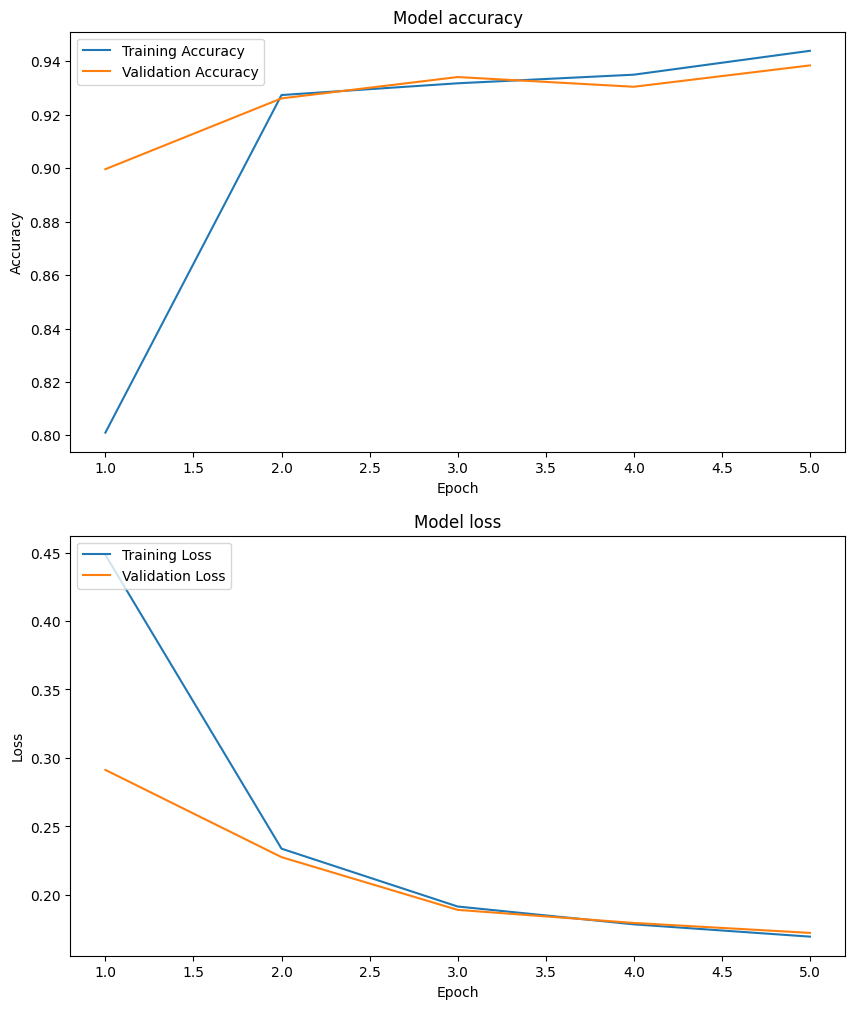

In [29]:
plot_learningCurve(history, 5)

In [44]:
# saving the model


from tensorflow.keras.models import load_model

model.save('my_model.keras')

In [13]:
y_pred = model.predict(validation_data_generator )


345/345 [==============================] - 99s 287ms/step


In [14]:
y_pred

array([[0.05873366],
       [0.9296763 ],
       [0.9855693 ],
       ...,
       [0.967708  ],
       [0.9496259 ],
       [0.43574584]], dtype=float32)

In [46]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

TEST SPECIFIC IMAGES

In [88]:
#Import relevant libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input

In [89]:
model=load_model('my_model.keras')

In [93]:
img=image.load_img(r'C:\Users\mugok\Desktop\Projects\Malaria Detection\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png',target_size=(65,65))

In [94]:
#convert the image to an array
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [95]:
x.shape

(65, 65, 3)

In [96]:
x=x/255

In [97]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 65, 65, 3)

In [98]:
model.predict(img_data)

1/1 [==============================] - 0s 392ms/step


array([[0.7927618]], dtype=float32)

In [99]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 142ms/step


In [100]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
